# Understanding Data Batches in Deep Learning

In deep learning, especially with standardized datasets like CIFAR-10, data is often stored in *batches* rather than as individual image files. This is done for efficiency:

- **Batch files** (like `data_batch_1` through `data_batch_5`) each contain thousands of images, stored as Numpy arrays of raw pixel values.
- **Why batches?** Loading 50,000 individual small images from disk is slow. Loading a few large batch files is much faster for both CPUs and GPUs.
- **How do we use them?** Libraries like PyTorch's `torchvision.datasets.CIFAR10` know how to open these batch files and convert them back into images for your model.

This approach is common in deep learning to speed up data loading and training.

# Inspecting CIFAR-10 Batch Files

The CIFAR-10 dataset is distributed as several files named `data_batch_1` through `data_batch_5` (for training) and `test_batch` (for testing). Each batch file contains 10,000 images stored as Numpy arrays, not as individual image files.

- These files are located in the `data/cifar-10-batches-py/` directory after running the setup script.
- Each file is a Python pickle containing a dictionary with image data and labels.

Let's inspect the contents of one of these batch files to see how the data is stored.

In [13]:
import pickle
import numpy as np
import os

# Path to a CIFAR-10 batch file
batch_file = '../data/cifar-10-batches-py/data_batch_1'

with open(batch_file, 'rb') as f:
    batch = pickle.load(f, encoding='bytes')

print(f"Keys in batch file: {list(batch.keys())}")
print(f"Shape of data array: {batch[b'data'].shape}")
print(f"First 10 labels: {batch[b'labels'][:10]}")

Keys in batch file: [b'batch_label', b'labels', b'data', b'filenames']
Shape of data array: (10000, 3072)
First 10 labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


# Visualizing CIFAR-10 Images with PyTorch

Now let's use PyTorch and torchvision to load the CIFAR-10 dataset and visualize the first 10 images with their class labels. This is a common step in Exploratory Data Analysis (EDA) to get a sense of what the data looks like.

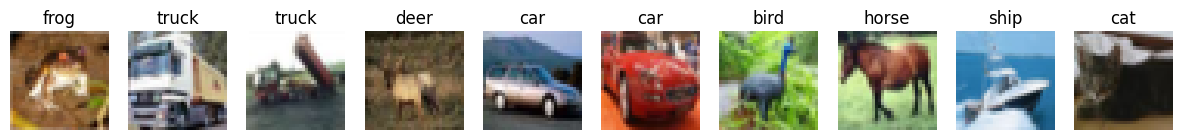

In [14]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Load a small piece of the data
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    img, label = cifar10[i]
    axes[i].imshow(np.asarray(img))
    axes[i].set_title(classes[label])
    axes[i].axis('off')
plt.show()

# Ensuring .gitignore is Properly Configured

To avoid accidentally committing large datasets or unnecessary files, make sure your `.gitignore` file is present in the root directory and contains the correct entries. For this project, it should include:

- `data/` (to ignore the dataset)
- `models/` (to ignore saved models)
- `venv/`, `.venv/`, `__pycache__/` (to ignore environments and Python cache)
- `runs/` (to ignore TensorBoard logs)
- `.ipynb_checkpoints/`, `.vscode/`, `.DS_Store` (to ignore IDE and OS files)

Let's check that the file exists and print its contents.

In [15]:
# Check for .gitignore and print its contents
import os

gitignore_path = '../.gitignore'
if os.path.exists(gitignore_path):
    with open(gitignore_path, 'r') as f:
        print(f.read())
else:
    print(".gitignore file not found in the root directory!")

# Data and Models
data/
models/
*.pt
*.pth

# Python environment and cache
venv/
.venv/
__pycache__/
*.py[cod]

# OS and IDE files
.DS_Store
.vscode/
.ipynb_checkpoints/

# Logs
runs/

#personal notes
notes/



# Exploratory Data Analysis (EDA) for CIFAR-10

Exploratory Data Analysis (EDA) is a critical first step in any machine learning project. It helps you:
- Understand the structure and balance of your dataset
- Visualize what your model will see
- Catch issues like class imbalance, data corruption, or problematic augmentations

In this section, we'll perform and explain several high-value EDA steps for CIFAR-10:

1. **Class Distribution:** Check if the dataset is balanced across all classes.
2. **Mean Pixel Intensity:** Visualize the average image for each class to understand color and brightness patterns.
3. **Augmentation Preview:** See how data augmentations (like cropping and flipping) affect your images.

For each, we'll show the code, the plot, and a brief interpretation.

## 1. Class Distribution

Let's check if the CIFAR-10 training set is balanced across all 10 classes. This is important to ensure the model doesn't become biased toward any class.

We'll plot a bar chart showing the number of images per class.

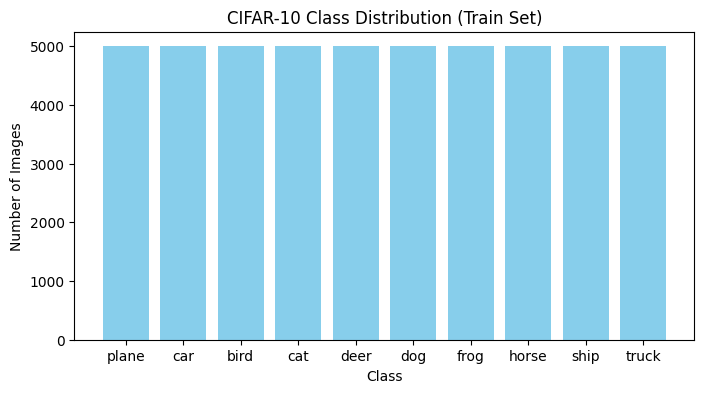

In [16]:
from collections import Counter
import matplotlib.pyplot as plt
import torchvision

# Load the training set
cifar10_train = torchvision.datasets.CIFAR10(root='../data', train=True, download=False)
labels = [label for _, label in cifar10_train]
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Count images per class
counts = Counter(labels)
plt.figure(figsize=(8,4))
plt.bar(classes, [counts[i] for i in range(10)], color='skyblue')
plt.title('CIFAR-10 Class Distribution (Train Set)')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

## 2. Mean Pixel Intensity (The "Brightness" Check)

Let's calculate and visualize the average image for each class in CIFAR-10. This helps us understand the typical color and brightness patterns for each class, and why normalization values are chosen as they are.

**Why it matters:**
- The average image for each class can reveal dominant colors (e.g., blue for ships/planes, green for frogs/deer).
- Helps explain why certain classes might be confused by the model.
- Shows the rationale behind the normalization values used in training.

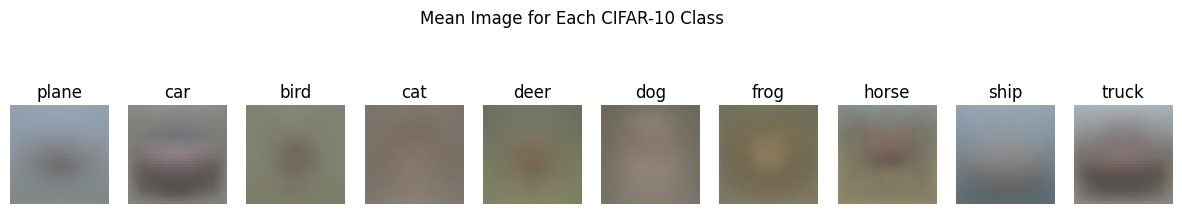

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

# Load the training set
cifar10_train = torchvision.datasets.CIFAR10(root='../data', train=True, download=False)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute mean image for each class
mean_images = []
for class_idx in range(10):
    imgs = [np.asarray(img) for img, label in cifar10_train if label == class_idx]
    mean_img = np.mean(imgs, axis=0).astype(np.uint8)
    mean_images.append(mean_img)

# Plot mean images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(mean_images[i])
    ax.set_title(classes[i])
    ax.axis('off')
plt.suptitle('Mean Image for Each CIFAR-10 Class')
plt.show()

**Interpretation:**
- Notice how the average images for "ship" and "plane" are dominated by blue, while "frog" and "deer" have more green/brown.
- This helps explain why the model might confuse certain classes, and why normalization values are chosen based on the dataset's overall color distribution.

## 3. Augmentation Preview (The "Sanity" Check)

Let's visualize how our data augmentations (like RandomCrop and RandomHorizontalFlip) affect a single image. This helps ensure that our augmentations are not too aggressive and that the model will still see meaningful images during training.

**Why it matters:**
- Prevents over-augmentation (e.g., cropping out important features).
- Confirms that augmentations are working as intended.
- Helps debug data pipeline issues early.

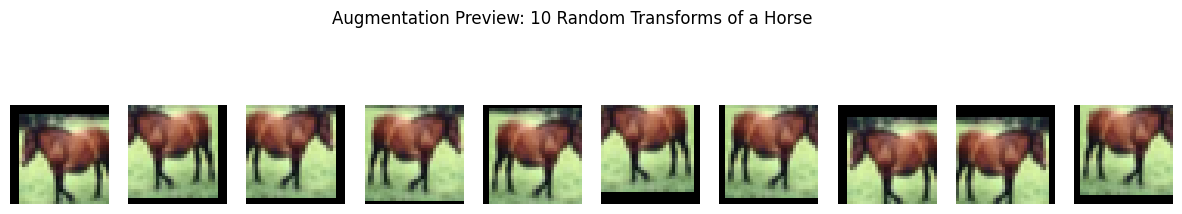

In [18]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the same augmentations as in your train.py
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# Pick a sample image (e.g., first horse)
class_idx = 7  # horse
img = next(img for img, label in cifar10_train if label == class_idx)

# Apply augmentation 10 times
augmented_imgs = [transform_train(img).permute(1, 2, 0).numpy() for _ in range(10)]

# Plot the augmented images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(augmented_imgs[i])
    ax.axis('off')
plt.suptitle('Augmentation Preview: 10 Random Transforms of a Horse')
plt.show()

**Interpretation:**
- Each image shows a different random crop and/or flip of the same horse.
- If important features (like the horse's head) are consistently missing, consider adjusting your augmentation parameters.
- This check ensures your model will see meaningful, varied data during training.